In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [12]:
# Load training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [13]:
# Select relevant features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [14]:
# Prepare the training data (drop rows with missing values in selected columns)
train_data = train_df[features + [target]].dropna()
X_train = train_data[features]
y_train = train_data[target]


In [15]:
# Prepare the test data (fill missing values with column mean if any)
X_test = test_df[features].fillna(test_df[features].mean())


In [16]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict on the test set
predictions = model.predict(X_test)

In [18]:
# Evaluate the model on training data
train_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 2628535155.618378
R-squared (R²): 0.5832212987566321


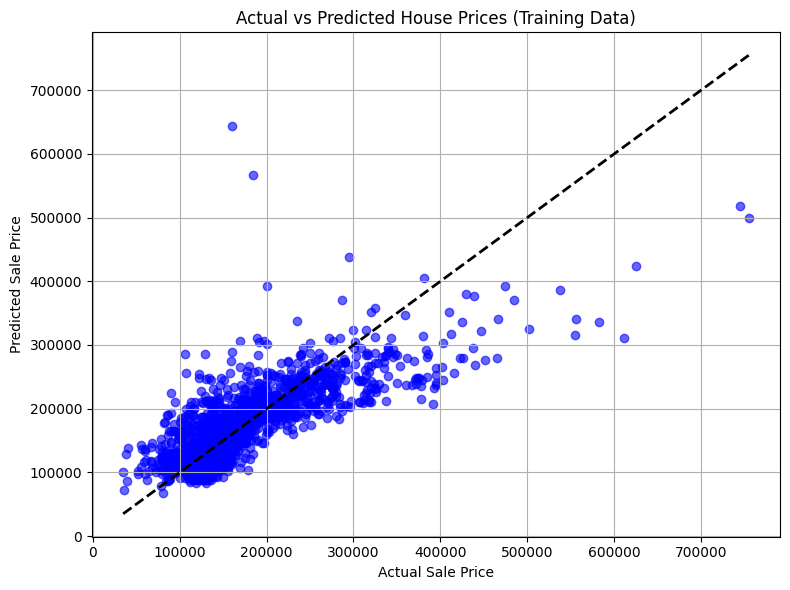

In [19]:
# Plot actual vs predicted values on training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_predictions, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices (Training Data)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Save predictions to CSV
output = pd.DataFrame({
    'Id': test_df['Id'],
    'PredictedSalePrice': predictions
})
output.to_csv('house_price_predictions.csv', index=False)
print("Predictions saved to 'house_price_predictions.csv'")


Predictions saved to 'house_price_predictions.csv'
